In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from __future__ import division
%matplotlib inline
from IPython.display import display

In [2]:
# get our state names again
state_names = pd.read_csv('Datasets/StateNames.csv', delimiter = ',', usecols = [1, 2, 3, 4, 5])
# slow, but less annoying than typing in manually...
state_list = np.unique(state_names['State'].values)

In [3]:
print len(state_list)

51


In [4]:
# get our most representative names
region_names = pd.read_csv('Datasets/repres_names/repres_names.csv', delimiter = ',')
display(region_names.head())

,Africa,Americas,Asia,Europe,Oceania,Total
0,Charlee,Grey,Sura,Roxie,Sloan,Mckinley
1,Raelyn,Nikolai,Ariella,Leeta,Weston,Milan
2,Emberly,Sura,Yerachmiel,Lona,Solange,Mccoy
3,Kathalina,Remi,Elif,Susie,Boone,Adelina
4,Jader,Jenson,Adrielle,Eugenie,Kiyomi,Evalina


In [5]:
# requires a state_list and region_names global
def cross_best_names(region, year, byDecade=False):
    # build a dictionary of counts by state and then name
    # count by decade as an option
    years = range(year, year + 11 if byDecade else year + 1)
    state_names_by_year = state_names[state_names['Year'].isin(years)]
    names_dict = {}
    names = state_names_by_year.iloc[:,0].values
    counts = state_names_by_year.iloc[:,-1].values
    states = state_names_by_year.iloc[:,-2].values
    for i in range(len(state_names_by_year.index)):
        if states[i] not in names_dict:
            names_dict[states[i]] = {}
        if names[i] not in names_dict[states[i]]:
            names_dict[states[i]][names[i]] = counts[i]
        else:
            names_dict[states[i]][names[i]] += counts[i]
    # build our matrix of names by states
    df = pd.DataFrame(index=state_list)
    for n in region_names[region]:
        state_name_counts = []
        for s in state_list:
            if s in names_dict and n in names_dict[s]:
                state_name_counts.append(names_dict[s][n])
            else:
                state_name_counts.append(0)    
        df[n] = pd.Series(state_name_counts, index=state_list)
    return df

In [6]:
# examples
display(cross_best_names('Europe', 1940, byDecade=True).head())
display(cross_best_names('Europe', 1940).head())
display(cross_best_names('Asia', 1990).head())
display(cross_best_names('Europe', 1890).head())

,Roxie,Leeta,Lona,Susie,Eugenie,Parthenia,Sylvania,Dagmar,Olinda,Lesta,...,Pearlie,Rosetta,Theodosia,Norine,Aggie,Pinkie,Leonia,Floretta,Rowena,Freida
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,93,0,0,727,0,0,0,0,0,0,...,430,382,0,0,0,83,0,11,0,115
AR,29,0,0,255,0,0,0,0,0,0,...,306,210,0,0,0,0,0,0,6,50
AZ,0,0,0,175,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,101,0,100,452,6,0,0,6,0,0,...,0,95,0,44,0,0,0,5,64,48


,Roxie,Leeta,Lona,Susie,Eugenie,Parthenia,Sylvania,Dagmar,Olinda,Lesta,...,Pearlie,Rosetta,Theodosia,Norine,Aggie,Pinkie,Leonia,Floretta,Rowena,Freida
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,8,0,0,73,0,0,0,0,0,0,...,36,23,0,0,0,12,0,0,0,0
AR,9,0,0,21,0,0,0,0,0,0,...,34,22,0,0,0,0,0,0,0,7
AZ,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,5,0,14,15,0,0,0,0,0,0,...,0,12,0,5,0,0,0,0,8,5


,Sura,Ariella,Yerachmiel,Elif,Adrielle,Jenson,Raelle,Saud,Adreena,Kiam,...,Sapphira,Zuri,Mysha,Batsheva,Aubri,Jubilee,Kenzie,Leevi,Setareh,Quinne
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,25,0,0,0,0,0,0,0,0,...,0,7,0,0,0,0,7,0,0,0


,Roxie,Leeta,Lona,Susie,Eugenie,Parthenia,Sylvania,Dagmar,Olinda,Lesta,...,Pearlie,Rosetta,Theodosia,Norine,Aggie,Pinkie,Leonia,Floretta,Rowena,Freida
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
regions = pd.read_csv('regions.csv', delimiter = ',', usecols = [2], header=None)

In [52]:
#Function to plot first two principal components
def pca_per_decaderegion(region, decade, ax):
    x = cross_best_names(region, decade, byDecade=True)
    df_norm = (x-x.mean())/x.std()
    df_norm = df_norm.fillna(0)
    #Apply PCA to data and get the top 2 axes of maximum variation
    pca = PCA(n_components=2)
    pca.fit(df_norm.values)

    #Project to the data onto the two axes
    x_reduced = pca.transform(df_norm.values)
    
    region_x = pd.DataFrame(x_reduced, columns=['PC-1', 'PC-2'])
    us_region = region_x.join(regions)
    
    #print x_reduced
    #Visualized our reduced data
    #region.ix[region['region']== 'South', 1]
    ax.scatter(us_region.ix[us_region.iloc[:,2] == 'South', 0], us_region.ix[us_region.iloc[:,2] == 'South', 1], 
           color='b', label = 'South')
    ax.scatter(us_region.ix[us_region.iloc[:,2] == 'West', 0], us_region.ix[us_region.iloc[:,2] == 'West', 1], 
           color='g', label = 'West')
    ax.scatter(us_region.ix[us_region.iloc[:,2] == 'Midwest', 0], us_region.ix[us_region.iloc[:,2] == 'Midwest', 1], 
           color='r', label = 'Midwest')
    ax.scatter(us_region.ix[us_region.iloc[:,2] == 'Northeast', 0], us_region.ix[us_region.iloc[:,2] == 'Northeast', 1], 
           color='y', label = 'Northeast')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title(str(region) + str(decade)+'data projected onto the first 2 PCA components')
    ax.legend()
    
    return ax

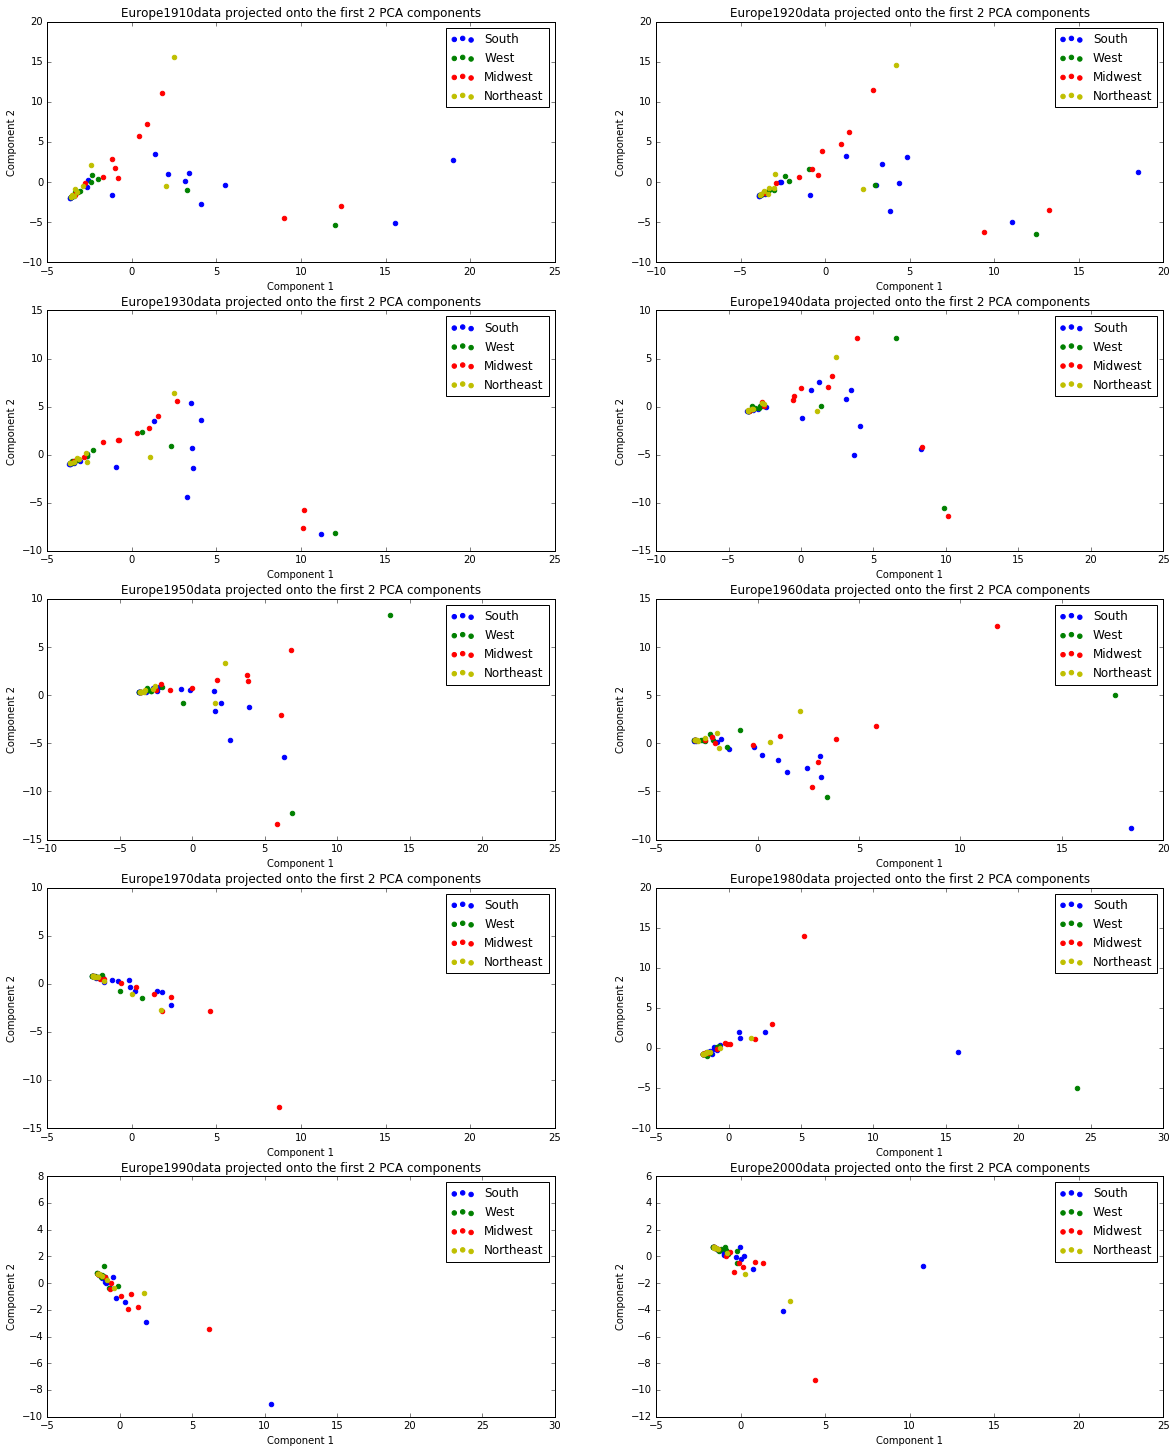

In [57]:
#plotting first two principal components for Europe per decade
fig, ax = plt.subplots(5, 2, figsize = (20,25))
ax[0,0] = pca_per_decaderegion('Europe',1910, ax[0,0])
ax[0,1] = pca_per_decaderegion('Europe',1920, ax[0,1])
ax[1,0] = pca_per_decaderegion('Europe',1930, ax[1,0])
ax[1,1] = pca_per_decaderegion('Europe',1940, ax[1,1])
ax[2,0] = pca_per_decaderegion('Europe',1950, ax[2,0])
ax[2,1] = pca_per_decaderegion('Europe',1960, ax[2,1])
ax[3,0] = pca_per_decaderegion('Europe',1970, ax[3,0])
ax[3,1] = pca_per_decaderegion('Europe',1980, ax[3,1])
ax[4,0] = pca_per_decaderegion('Europe',1990, ax[4,0])
ax[4,1] = pca_per_decaderegion('Europe',2000, ax[4,1])

#plt.tight_layout()
plt.show()

In [59]:
#function to print names that account for most variance in each principal component
def babyname_variance_explained(region, decade):
    x = cross_best_names(region, decade, byDecade=True)
    df_norm = (x-x.mean())/x.std()
    df_norm = df_norm.fillna(0)
    pca = PCA(n_components=2)
    pca.fit(df_norm.values)
    #Project to the data onto the two axes
    x_reduced = pca.transform(df_norm.values)
    
    identify = pd.DataFrame(pca.components_.T, columns=['PC-1', 'PC-2'], index=x.columns)

    identify_abs = identify.abs()
    
    print "Most represented names in", region , str(decade) + ':' , identify_abs['PC-1'].idxmax(),identify_abs['PC-2'].idxmax()
    identify_abs

In [60]:
decades = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
for i in range(11):
    babyname_variance_explained('Europe',decades[i])
    babyname_variance_explained('Africa',decades[i])
    babyname_variance_explained('Asia',decades[i])
    babyname_variance_explained('Oceania',decades[i]) 
    babyname_variance_explained('Americas',decades[i])

Most represented names in Europe 1910: Pearlie Freda
Most represented names in Africa 1910: Valentina Grayson
Most represented names in Asia 1910: Weston Boone
Most represented names in Oceania 1910: Levi Sloan
Most represented names in Americas 1910: Bennett Boone
Most represented names in Europe 1920: Pearlie Rose
Most represented names in Africa 1920: Lennon Valentina
Most represented names in Asia 1920: Weston Nash
Most represented names in Oceania 1920: Dahlia Remy
Most represented names in Americas 1920: Bennett Aubrey
Most represented names in Europe 1930: Barney Reta
Most represented names in Africa 1930: Freya Lennon
Most represented names in Asia 1930: Weston Sura
Most represented names in Oceania 1930: Aubrey Titus
Most represented names in Americas 1930: Bennett Dahlia
Most represented names in Europe 1940: Susie Luvenia
Most represented names in Africa 1940: Freya Grayson
Most represented names in Asia 1940: Weston Ariella
Most represented names in Oceania 1940: Aubrey Tit

In [16]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x_eu)

#Project to the data onto the three axes
x_reduced = pca.transform(x_eu)

#print x_reduced
print x_reduced
print  pca.components_[1]
#sorted([(i, temp) for i in range(len(temp))], lambda x: x[1])

[ -4.87139032e-03   1.29681574e-16   1.63964203e-03  -4.32439290e-02
   7.92621528e-04  -6.78040842e-05   4.21560115e-18   2.65605197e-05
   1.19716856e-17   4.88855754e-17  -1.63895894e-17  -7.38027385e-04
  -8.85289459e-05  -1.10056038e-03   7.37853425e-04  -1.88915611e-03
   3.10569949e-03  -6.05135983e-03  -2.55864644e-03  -9.89471655e-05
  -3.99682784e-17  -9.33859759e-05   1.22842899e-04   1.82895863e-17
  -1.35055348e-17  -1.64036535e-04   4.36166292e-17  -1.56272037e-04
  -1.43048261e-04  -2.50668692e-02  -3.39020421e-05  -8.68825872e-04
  -4.69692339e-04  -1.26722237e-03  -1.00923266e-02  -1.83429228e-20
   3.12130297e-19   9.92254867e-02   5.58266697e-06  -1.41380780e-02
   9.52848013e-04  -6.32275627e-04  -1.01132366e-04   4.04428132e-21
  -1.83440497e-03   3.89480690e-03  -6.78347548e-03  -2.52176725e-01
  -1.83207900e-04  -3.20619317e-04   0.00000000e+00   2.93759784e-02
  -3.19508149e-04   0.00000000e+00  -1.86609845e-03  -1.10171571e-03
  -7.00557407e-03  -1.80766946e-04

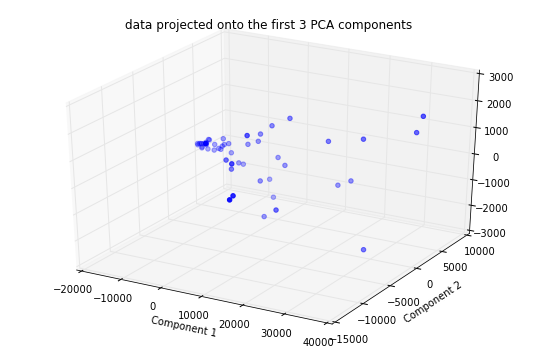

In [35]:
fig = plt.figure(figsize=(15, 5))
#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax2.scatter(x_reduced[:,0],x_reduced[:,1], x_reduced[:,2],c='b', color='b', )

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 3 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

NameError: name 'region' is not defined